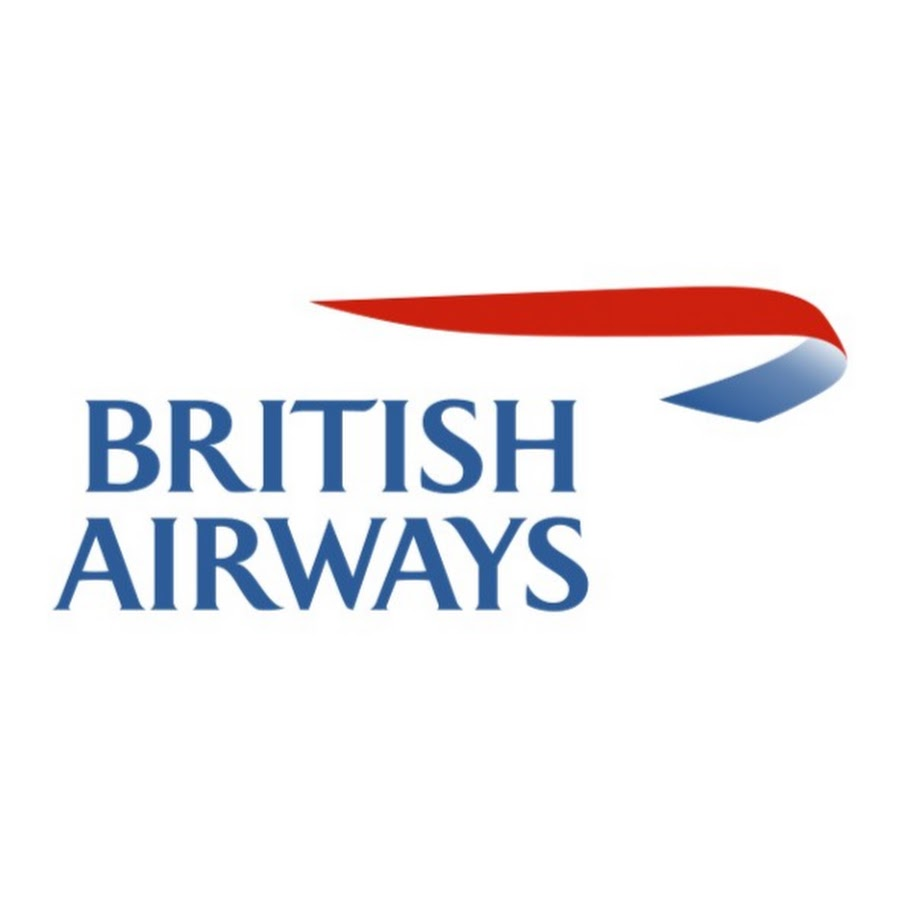

In [1]:
from IPython.display import Image
Image('BA.jpeg',width=400)

# Introduction
### Founded in 1919, British Airways is an airline of United Kingdom and it is one of world’s largest airline and UK’s second largest carrier, it is based on passengers carried and fleet size behind easyJet. British Airways is the first passenger airlines which has generated more than US $1 billion on a single route in one year.


### I have chosen this dataset it contains 1200 rows and 18 columns. The columns are title, rating, review_date, review, trip_verified, aircraft, type_of_traveller, seat_type, route, date_flown, seat_comfort, cabin_staff_service, food_and_beverages, ground_service, value_for_money, wifi_and_connecticity, recommend, wifi_and_connectivity most of the columns contains null values and are non-useful for the dataset so for my analysis I will work on this dataset and will try to boost the business sales.

# Problem
### The problem British airlines currently facing is decreased in sales which needs to boost to gain access to new clients and a deeper knowledge of their existing consumer.

# Importing Libraries 
### To remove noisy data and to analyse the dataset to find solution we will first import necessay libraries and then we will do the data exploration part by finding the shape of the dataset, missing values, visualising the missing values using heatmap, info of the dataset, descriptive statistics and data types.

In [2]:
import csv           #importing csv to read the dataset.
import datetime      #importing datetime to convert the dtype
import nltk          #using the nltk for sentiment analysis
import pandas as pd  #to analyse the dataset
import numpy as np   #to work with the numerical values
import seaborn as sns #to understand the dataset and plot charts using dataset.
from wordcloud import WordCloud   #to plot wordcloud chart
from textblob import TextBlob     #to process my textual data
import matplotlib.pyplot as plt   #to visualise charts
from dateutil.parser import parse

In [3]:
df = pd.read_csv("british-airways.csv")
df.head()

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
0,"""Will honestly never fly them again if I can h...",4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,3.0,2.0,NaN,4.0,2,NaN,False,NaN
1,"""Very unprofessional for a renowned airline li...",1,19/11/2022,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1.0,1.0,"<span class=""star fill"">1</span>",1.0,1,NaN,False,1.0
2,"""lounge was overcrowded and worn out""",2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,4.0,2.0,"<span class=""star fill"">4</span>",1.0,1,NaN,False,NaN
3,"""very uncomfortable trip""",1,07/11/2022,Not Verified | Worst experience ever. Outbound...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,2.0,5.0,"<span class=""star fill"">2</span>",2.0,1,NaN,False,2.0
4,"""rate this just as a mediocre journey""",5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,1.0,3.0,"<span class=""star fill"">1</span>",2.0,3,NaN,True,NaN


# Data Exploration
### Checking the shape of the dataset

In [4]:
df.shape

(1200, 18)

### Checking the info of the dataset columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1200 non-null   object 
 1   rating                 1200 non-null   int64  
 2   review_date            1200 non-null   object 
 3   review                 1200 non-null   object 
 4   trip_verified          1200 non-null   bool   
 5   aircraft               720 non-null    object 
 6   type_of_traveller      1199 non-null   object 
 7   seat_type              1200 non-null   object 
 8   route                  1198 non-null   object 
 9   date_flown             1200 non-null   object 
 10  seat_comfort           1124 non-null   float64
 11  cabin_staff_service    1117 non-null   float64
 12  food_and_beverages     670 non-null    object 
 13  ground_service         1147 non-null   float64
 14  value_for_money        1200 non-null   int64  
 15  wifi

### Checking the descriptive statistics of the data

In [6]:
df.describe()

,rating,seat_comfort,cabin_staff_service,ground_service,value_for_money,wifi_and_connecticity,wifi_and_connectivity
count,1200.000000,1124.000000,1117.000000,1147.000000,1200.000000,0.0,287.000000
mean,4.397500,2.782028,3.179946,2.782040,2.530833,NaN,2.149826
std,3.238554,1.377079,1.526595,1.486856,1.468848,NaN,1.482482
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,NaN,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,NaN,1.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,NaN,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000


### Checking the types of the dataset columns.

In [7]:
df.dtypes

title                     object
rating                     int64
review_date               object
review                    object
trip_verified               bool
aircraft                  object
type_of_traveller         object
seat_type                 object
route                     object
date_flown                object
seat_comfort             float64
cabin_staff_service      float64
food_and_beverages        object
ground_service           float64
value_for_money            int64
wifi_and_connecticity    float64
recommend                   bool
wifi_and_connectivity    float64
dtype: object

### Checking the total null values in the dataset.

In [8]:
df.isnull().sum().sum()

3338

### Visualising the missing value by using the heatmap the white marks are for the missing values and the black marks are the non-missing values.

<Axes: >

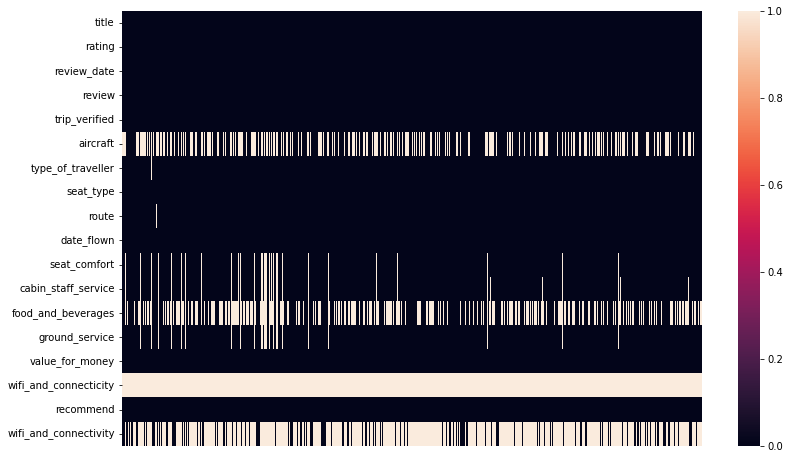

In [9]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna().transpose(),xticklabels=False)

### As we can see there are lots of missing values in the above chart specially the columns which are not that useful so we will remove those while cleaning the dataset.

# Data Cleaning

### Changing the dtypes using the .convert_dtypes() which will convert the dataset into possible datatype.

In [10]:
df = df.convert_dtypes()
df

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
0,"""Will honestly never fly them again if I can h...",4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,True,<NA>,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,3,2,<NA>,4,2,<NA>,False,<NA>
1,"""Very unprofessional for a renowned airline li...",1,19/11/2022,This is the worst experience I have ever had w...,True,<NA>,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1,1,"<span class=""star fill"">1</span>",1,1,<NA>,False,1
2,"""lounge was overcrowded and worn out""",2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,4,2,"<span class=""star fill"">4</span>",1,1,<NA>,False,<NA>
3,"""very uncomfortable trip""",1,07/11/2022,Not Verified | Worst experience ever. Outbound...,False,<NA>,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,2,5,"<span class=""star fill"">2</span>",2,1,<NA>,False,2
4,"""rate this just as a mediocre journey""",5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,1,3,"<span class=""star fill"">1</span>",2,3,<NA>,True,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,"""nice flight with good cabin service""",9,11/09/2017,✅ Verified Review | London Heathrow to Biarri...,False,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,Sep-17,4,5,<NA>,4,4,<NA>,True,<NA>
1196,"""they are just an embarrassment""",2,11/09/2017,✅ Verified Review | London Gatwick to Funchal...,False,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,Sep-17,1,1,<NA>,2,1,<NA>,False,<NA>
1197,"""very good flight again""",8,09/09/2017,✅ Verified Review | Zakinthos to London Heath...,False,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,Sep-17,4,5,"<span class=""star fill"">2</span>",2,5,<NA>,True,<NA>
1198,"""expensive at £343 return""",8,09/09/2017,✅ Verified Review | Flew British Airways from...,False,A319,Business,Economy Class,Belfast City to London Heathrow,Sep-17,3,4,<NA>,5,2,<NA>,True,<NA>


### Changing the format of the "review_date" column.

In [11]:
df['review_date'] = pd.to_datetime(df['review_date'], format='%d/%m/%Y').dt.strftime('%d-%m-%Y')
df.head(3)

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
0,"""Will honestly never fly them again if I can h...",4,19-11-2022,Flew from Amman to London on Nov. 14 2022. Not...,True,<NA>,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,3,2,<NA>,4,2,<NA>,False,<NA>
1,"""Very unprofessional for a renowned airline li...",1,19-11-2022,This is the worst experience I have ever had w...,True,<NA>,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1,1,"<span class=""star fill"">1</span>",1,1,<NA>,False,1
2,"""lounge was overcrowded and worn out""",2,18-11-2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,4,2,"<span class=""star fill"">4</span>",1,1,<NA>,False,<NA>


### Checking the dtype of the "review_date" column.

In [12]:
df['review_date'].dtypes

dtype('O')

In [13]:
# Converting the "review_date" column to datetime dtype
df["review_date"] = pd.to_datetime(df["review_date"])
df.to_csv("updated_dataset.csv", index=False)

<ipython-input-13-17675bd16362>:2: UserWarning: Parsing '19-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["review_date"] = pd.to_datetime(df["review_date"])
<ipython-input-13-17675bd16362>:2: UserWarning: Parsing '18-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["review_date"] = pd.to_datetime(df["review_date"])
<ipython-input-13-17675bd16362>:2: UserWarning: Parsing '31-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["review_date"] = pd.to_datetime(df["review_date"])
<ipython-input-13-17675bd16362>:2: UserWarning: Parsing '30-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["review_date"] = pd.to_datetime(df["review_date"])
<ipython-input-13-17675bd16362>:2: UserWarning: Parsing '25-10-2022' in DD/MM/YYYY format. Provide forma

### Again checking the dtype for all the columns.

In [14]:
df.dtypes

title                            string
rating                            Int64
review_date              datetime64[ns]
review                           string
trip_verified                   boolean
aircraft                         string
type_of_traveller                string
seat_type                        string
route                            string
date_flown                       string
seat_comfort                      Int64
cabin_staff_service               Int64
food_and_beverages               string
ground_service                    Int64
value_for_money                   Int64
wifi_and_connecticity             Int64
recommend                       boolean
wifi_and_connectivity             Int64
dtype: object

### Dropping Unwanted columns from the dataset.

In [15]:
df.drop("review", axis=1, inplace=True)
df.drop("seat_comfort", axis=1, inplace=True)
df.drop("cabin_staff_service", axis=1, inplace=True)
df.drop("ground_service", axis=1, inplace=True)
df.drop("food_and_beverages", axis=1, inplace=True)
df.drop("wifi_and_connectivity", axis=1, inplace=True)
df.drop("wifi_and_connecticity", axis=1, inplace=True)
df.head(3)

,title,rating,review_date,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,value_for_money,recommend
0,"""Will honestly never fly them again if I can h...",4,2022-11-19,True,<NA>,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,2,False
1,"""Very unprofessional for a renowned airline li...",1,2022-11-19,True,<NA>,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1,False
2,"""lounge was overcrowded and worn out""",2,2022-11-18,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,1,False


### Filling Nan values with Unknown or mode values and changing the dtypes of the specific columns.

In [16]:
df["aircraft"].fillna("Unknown", inplace=True)
df["type_of_traveller"].fillna(df["type_of_traveller"].mode()[0], inplace=True)
df["route"].fillna(df["route"].mode()[0], inplace=True)

df["recommend"] = df["recommend"].astype(int)
df["trip_verified"] = df["trip_verified"].astype(int)

In [17]:
df.head(3) # checking the columns again 

,title,rating,review_date,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,value_for_money,recommend
0,"""Will honestly never fly them again if I can h...",4,2022-11-19,1,Unknown,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,2,0
1,"""Very unprofessional for a renowned airline li...",1,2022-11-19,1,Unknown,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1,0
2,"""lounge was overcrowded and worn out""",2,2022-11-18,1,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,1,0


### Checking if there are still any null values in the dataset.

In [18]:
df.isnull().sum().sum()

0

### Checking the dtypes after removing unwanted columns and filling the nan values.

In [19]:
df.dtypes

title                        string
rating                        Int64
review_date          datetime64[ns]
trip_verified                 int64
aircraft                     string
type_of_traveller            string
seat_type                    string
route                        string
date_flown                   string
value_for_money               Int64
recommend                     int64
dtype: object

###Visualising the dataset using a Heatmap

<Axes: >

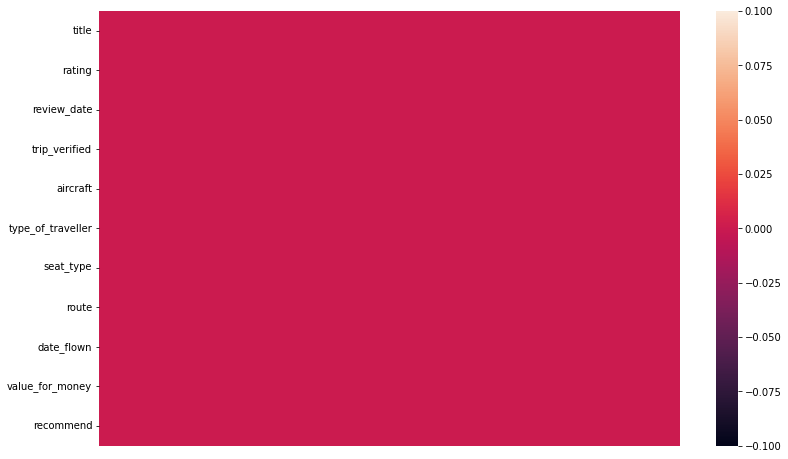

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna().transpose(),xticklabels=False)

### Now the data is clean I will now Visualise and Analyse my dataset using sentiment analysis and text mining, data mining method.
### Below I am doing the sentiment analysis using the rating column, by using the if else statement within the def function to check the positive and negative rating, and then after that applying the sentiment analysis using apply() method and storing the value in a new sentiment column.

In [21]:
# defining a function to categorize ratings into sentiment labels
def get_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

# appling the sentiment analysis function to the "rating" column
df['sentiment'] = df['rating'].apply(get_sentiment)

# viewing the resulting dataframe with sentiment labels
df

,title,rating,review_date,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,value_for_money,recommend,sentiment
0,"""Will honestly never fly them again if I can h...",4,2022-11-19,1,Unknown,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,2,0,Positive
1,"""Very unprofessional for a renowned airline li...",1,2022-11-19,1,Unknown,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1,0,Negative
2,"""lounge was overcrowded and worn out""",2,2022-11-18,1,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,1,0,Negative
3,"""very uncomfortable trip""",1,2022-07-11,0,Unknown,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,1,0,Negative
4,"""rate this just as a mediocre journey""",5,2022-07-11,1,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,3,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,"""nice flight with good cabin service""",9,2017-11-09,0,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,Sep-17,4,1,Positive
1196,"""they are just an embarrassment""",2,2017-11-09,0,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,Sep-17,1,0,Negative
1197,"""very good flight again""",8,2017-09-09,0,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,Sep-17,5,1,Positive
1198,"""expensive at £343 return""",8,2017-09-09,0,A319,Business,Economy Class,Belfast City to London Heathrow,Sep-17,2,1,Positive


In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Here I am again doing the sentiment analysis using the title column which is actullay the title of reviews.
### First importing the Sentiment analyzer using nltk.sentiment and then using the if else within the def get_sentiment function using text column and then using the apply() method on title column and storing the values in the sentiment column.

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

# creating an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# defining a function to perform sentiment analysis on a text
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0:
        return 'Positive'
    elif score['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

# applying the sentiment analysis function to the "review" column
df['sentiment'] = df['title'].apply(get_sentiment)

# viewing the resulting dataframe with sentiment scores
df

,title,rating,review_date,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,value_for_money,recommend,sentiment
0,"""Will honestly never fly them again if I can h...",4,2022-11-19,1,Unknown,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,2,0,Positive
1,"""Very unprofessional for a renowned airline li...",1,2022-11-19,1,Unknown,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1,0,Negative
2,"""lounge was overcrowded and worn out""",2,2022-11-18,1,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,1,0,Negative
3,"""very uncomfortable trip""",1,2022-07-11,0,Unknown,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,1,0,Negative
4,"""rate this just as a mediocre journey""",5,2022-07-11,1,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,3,1,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,"""nice flight with good cabin service""",9,2017-11-09,0,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,Sep-17,4,1,Positive
1196,"""they are just an embarrassment""",2,2017-11-09,0,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,Sep-17,1,0,Negative
1197,"""very good flight again""",8,2017-09-09,0,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,Sep-17,5,1,Positive
1198,"""expensive at £343 return""",8,2017-09-09,0,A319,Business,Economy Class,Belfast City to London Heathrow,Sep-17,2,1,Neutral


### Using the Stemmer and Lemmatizer method to remove the unwanted charaters from the title column and also removing the punctuations.

In [24]:
import re     #to match the string to a regular expression
from nltk.stem import PorterStemmer, WordNetLemmatizer

def remove_char(text):
  # removing non-alphanumeric characters
  text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
  # removing excess whitespace
  text = re.sub('\s+',' ', text)
  
  # stemming
  stemmer = PorterStemmer()
  stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
  
  # lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in stemmed_text.split()])
  
  return lemmatized_text


### Using Text Mining process for the "Title" column, to extract valuable text insights from the unstructured text.

In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
df['title'] = df['title'].apply(lambda x:remove_char(x))
df.head(3)

,title,rating,review_date,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,value_for_money,recommend,sentiment
0,will honestli never fli them again if i can he...,4,2022-11-19,1,Unknown,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,2,0,Positive
1,veri unprofession for a renown airlin like ba,1,2022-11-19,1,Unknown,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1,0,Negative
2,loung wa overcrowd and worn out,2,2022-11-18,1,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,1,0,Negative


In [27]:
df['title'].head(15)

0     will honestli never fli them again if i can he...
1         veri unprofession for a renown airlin like ba
2                       loung wa overcrowd and worn out
3                                   veri uncomfort trip
4                     rate thi just a a mediocr journey
5                   baggag yet to be deliv after 5 week
6                  misplac our luggag dure our wed trip
7                          zero faith in british airway
8                             under whelm by the experi
9                           about a abysm a you can get
10                             ha return to full servic
11                              thi flight wa quit good
12                no attempt to provid fresh or hot foo
13                                  a veri posit experi
14                     baggag took 3/4 hour to be deliv
Name: title, dtype: object

### Print a Bar graph which will shows the total number of ratings given from range 1 to 10 using the rating column.
### The ratings data are then histogrammed using the hist() method.
### The xlabel(), ylabel(), and title() functions are then used in the code to add labels and a caption to the graph.
### The amount of ratings in each bin are added as text labels to each bar in the histogram using a for loop.
### The range is then set to show on the x-tick labels. Finally, the graph is displayed by calling the show() method.

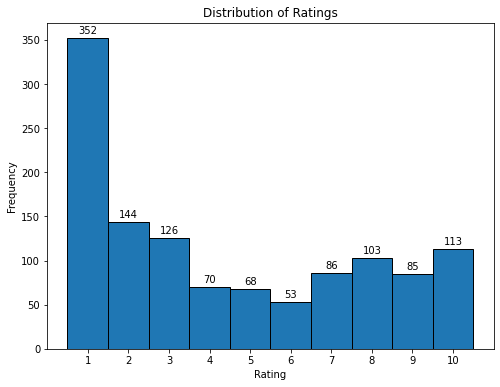

In [28]:
ratings = df["rating"]

# Creating a histogram using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(ratings, bins=10, range=(1, 10), edgecolor='black', color='#1f77b4')

# Adding labels and title on the graph
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")

# Adding counts to the x-axis to check the total number of ratings on each bar from range 1 to 10.
for i, patch in enumerate(patches):
    ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, str(int(n[i])), ha='center')

# Setting x-tick labels to get range on each bar.
bin_centers = 0.5 * (bins[1:] + bins[:-1])
xtick_labels = np.arange(1, 11)
plt.xticks(bin_centers, xtick_labels)

# Displaying the graph
plt.show()


### Printing a wordcloud chart using the title column to check the word count frequency.

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Using the wordcloud chart to represent the frequency of the title column.
### The first line of code imports the Seaborn library as sns, and the second line sets the style of the plot to use the "darkgrid" theme. The scatterplot() method of Seaborn is then used to produce a scatter plot. The x and y factors are used to specify the x and y variables, and the data parameter is used to specify the DataFrame. The "class" hue parameter is used to color the points according to the DataFrame's "class" field. 
### The title() method of Matplotlib is then used to add a title to the plot. Finally, the plot is displayed by using the show() method.

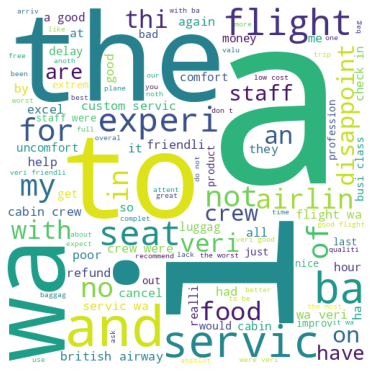

In [30]:
# creating a WordCloud object
wordcloud = WordCloud(width=500, height=500, background_color='white', 
                      stopwords=set(), min_font_size=10)

# generating word cloud from "title" column
text = ' '.join(df['title'].astype(str).tolist())
wordcloud.generate(text)

# plotting the word cloud
plt.figure(figsize=(8, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
plt.show()

### Here, I am again trying to print the word cloud using rating and title column to check the negative review.

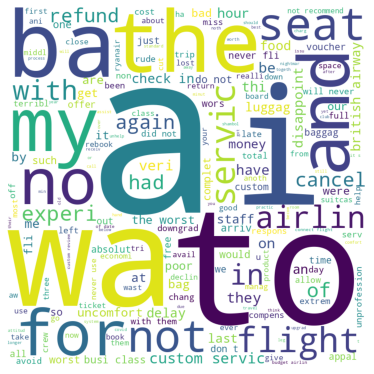

In [31]:
# filtering the negative reviews using rating column
negative_reviews = df[df['rating'] <= 2]

# creating a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', 
                      stopwords=set(), min_font_size=7)

# generating word cloud from negative "title" column
text = ' '.join(negative_reviews['title'].astype(str).tolist())
wordcloud.generate(text)

# plotting the word cloud
plt.figure(figsize=(8, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
plt.show()

### Plotting a line chart using the rating column to check the negative and positive reviews till the current year.
### The first two lines of code use boolean indexing to create two new DataFrames: one containing only reviews with a rating of 4 or higher (positive_reviews), and another containing only reviews with a rating of 2 or lower (negative_reviews).
### The code then groups the positive and negative reviews by month and year, using the to_period() function. It then counts the number of reviews in each group using the count() function, and stores the results in two new Series: positive_counts and negative_counts. Finally, the code creates a line plot using the plot() function of Pandas. The x-axis shows the month and year of each group, and the y-axis shows the reviews . The positive_counts and negative_counts are plotted on the same axes using different colors and labels.

### The resulting plot shows the trend in positive and negative reviews over time, and can help identify whether the airline is performing better or worse over time, based on customer sentiment.


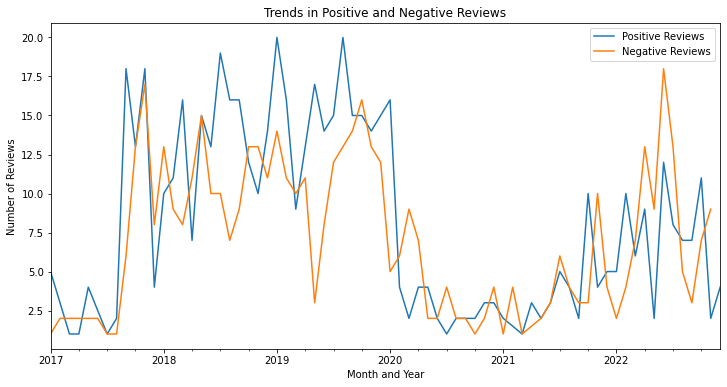

In [32]:
positive_reviews = df[df['rating'] >= 4]
negative_reviews = df[df['rating'] <= 2]

# grouping by month and year and counting the number of reviews
positive_counts = positive_reviews.groupby(positive_reviews['review_date'].dt.to_period('M')).count()['rating']
negative_counts = negative_reviews.groupby(negative_reviews['review_date'].dt.to_period('M')).count()['rating']

# creating a line plot for positive and negative reviews to check whether the airlines have more negative or more positive reviews.
fig, ax = plt.subplots(figsize=(12, 6))
positive_counts.plot(ax=ax, label="Positive Reviews")
negative_counts.plot(ax=ax, label="Negative Reviews")
ax.set_xlabel("Month and Year")
ax.set_ylabel("Number of Reviews")
ax.set_title("Trends in Positive and Negative Reviews")
plt.legend()

plt.show()

# Conclusion

### According to the research above, there are more negative reviews than positive ones. I believe the reason why most customers find it frustrating is because the baggage delivery service is slow and the refund for the cancelled flight is slow due to the customer service's slow reaction time. British Airlines delayed arrival has annoyed the customers, who would prefer to board other flights.

### British Airways can address the issues highlighted in the research by focusing on improving their operational efficiency, customer service, and communication with customers. By doing so, they can improve their reputation and retain loyal customers.

In [35]:
# %%shell
# jupyter nbconvert --to html 